#1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

n = 100
x = np.random.randn(n)
y = x+np.random.randn(n)
max_x = max(x)
min_x = min(x)
data = [(x[i], y[i]) for i in range(n)]
random.shuffle(data)


114.06619267021817
1.0293484159218937 -0.023999903534468302


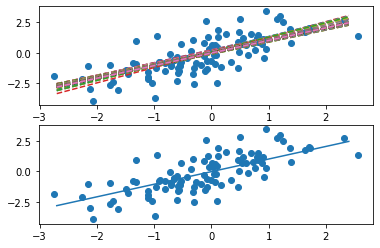

In [9]:

def fd_intercept(x, y, b, k):
    return -2 * (k * x + b - y)

def fd_slope(x, y, b, k):
    return -2 * x * (k * x + b - y)

def find_sum(slop, intercept):
    ans = 0
    for i in range(n):
        ans += (slop * data[i][0] + intercept - data[i][1]) ** 2
    return ans

def abline(slope, intercept, style):
    "Plot a line from slope and intercept"
    axes = plt.gca()
    x_vals = np.array([i / 10 for i in range(int(min_x * 10), int(max_x * 10))])
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, style)


def GD(slope, intercept):
    ans_slope = 0
    ans_intercept = 0
    for point in data:
        ans_slope += fd_slope(point[0], point[1], intercept, slope)
        ans_intercept += fd_intercept(point[0], point[1], intercept, slope)
    return [ans_slope, ans_intercept]


def SGD(slope, intercept):
    point = data[random.randint(0, len(data) - 1)]
    return [fd_slope(point[0], point[1], intercept, slope), fd_intercept(point[0], point[1], intercept, slope)]


def SGD_minibatch(slope, intercept, size_minibatch, step_minibatch):
    ans_slope = 0
    ans_intercept = 0
    for i in range(size_minibatch):
        point = data[step_minibatch * size_minibatch + i]
        ans_slope += fd_slope(point[0], point[1], intercept, slope)
        ans_intercept += fd_intercept(point[0], point[1], intercept, slope)
    return [ans_slope, ans_intercept]

def grad():
    step_minibatch = 0
    size_minibatch = 50

    slope, intercept = 1, 0
    max_step_diff = 1
    eps = 0.0000001
    lerning_rate = 0.05
    while max_step_diff > eps:
        #step_size = GD(slope, intercept)
        step_size = SGD(slope, intercept)
        #step_size = SGD_minibatch(slope, intercept, size_minibatch, step_minibatch)
        step_minibatch = step_minibatch + 1 if step_minibatch >= len(data) / size_minibatch else 0

        step_size_slope =  step_size[0] * lerning_rate
        step_size_intercept =  step_size[1] * lerning_rate

        slope += step_size_slope
        intercept += step_size_intercept
        max_step_diff = max(abs(step_size_intercept), abs(step_size_slope))
        lerning_rate *= 0.95
        abline(slope, intercept, '--')

    plt.subplot(2, 1, 2)
    plt.scatter(x, y)
    abline(slope, intercept, '-')
    print(find_sum(slope, intercept))
    print(slope, intercept)
    plt.show()
    step_minibatch = 1

plt.subplot(2, 1, 1) 
plt.scatter(x, y)
grad()

SUM:
minibatch20 = 119.21517170906864
minibatch50 = 116.63988684343313
SGD = 114.06619267021817
GD = 112.72226883826202


#2

In [11]:
from itertools import count
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import random


def f(x, y):
    return np.log(x * x + y * y) * x * y


def fdy(x, y):
    return np.log(x * x + y * y) * x + 2 * x * y * y / (x * x + y * y)


def fdx(x, y):
    return np.log(x * x + y * y) * y + 2 * x * x * y / (x * x + y * y)


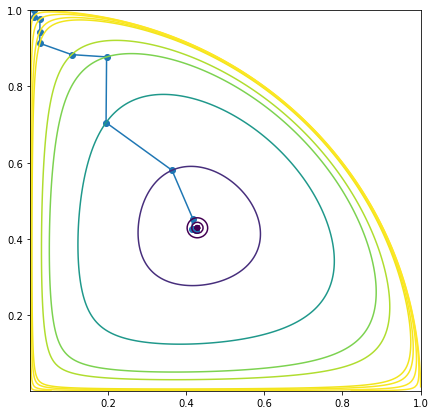

In [12]:
def STD_grad(point):
    random_d = random.randint(1, 3)
    if random_d == 1:
        return np.array([fdx(point[0], point[1]), 0])
    elif random_d == 2:
        return np.array([0, fdy(point[0], point[1])])
    return np.array([fdx(point[0], point[1]), fdy(point[0], point[1])])


def GD(point):
    return np.array([fdx(point[0], point[1]), fdy(point[0], point[1])])


def next_value_Nesterov(point, b , lr):
    return b * point + (STD_grad(point) + GD(point)) * -lr


def next_value_Momentum(point, b, lr):
    return b * point + STD_grad(point) * -lr


def gd(b, learning_rate):
    points = np.array([startPoint])
    epochs = 1
    #points = np.append(points, [next_value_Nesterov(points[0], b, learning_rate)], axis=0)
    points = np.append(points, [next_value_Momentum(points[0], b, learning_rate)], axis=0)
    for i in count(start=2, step=1):
        if abs(f(points[i - 1][0], points[i - 1][1]) - f(points[i - 2][0], points[i - 2][1])) < eps:
            break
        if i > 10000000:
            print("Ne povezlo ne fortanulo")
            break
        #points = np.append(points, [next_value_Nesterov(points[i - 1], b, learning_rate)], axis=0)
        points = np.append(points, [next_value_Momentum(points[i - 1], b, learning_rate)], axis=0)

        epochs += 1
    return points


plt.rcParams["figure.figsize"] = (7, 7)
np.set_printoptions(suppress=True)

t = np.linspace(0.001, 1, 200)
ox, oy = np.meshgrid(t, t)
startPoint = [0.01, 1]
eps = 0.000001

array = gd(0.9932, 0.5)
GDLine, = plt.plot(array[:, 0], array[:, 1], 'o-')
GDContour = plt.contour(ox, oy, f(ox, oy), levels=sorted({f(p[0], p[1]) for p in array}))

plt.show()

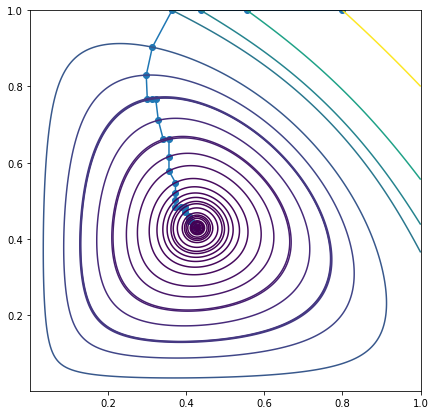

In [166]:
def update_G(G, point):
    grad = GD(point)
    return G + grad ** 2

def adam(G, point, previous_point, b1, b2, learning_race):
    alpha=1e-8
    grad = b1 * STD_grad(previous_point) +  STD_grad(point)
    for i in G:
        alpha = b2 * alpha + (1-b2) * learning_race / (1e-8 + np.sqrt(i))
    return point - alpha * grad

def rmsprop(G, point, b, learning_race):
    alpha=1e-8
    grad = STD_grad(point)
    for i in G:
        alpha = b * alpha + (1-b) * learning_race / (1e-8 + np.sqrt(i))
    return point - alpha * grad

def ada_grad(G, point, b, learning_race, alpha=1e-8):
    grad = STD_grad(point)
    alpha = 1e-8
    for i in G:
        alpha += learning_race / (1e-8 + np.sqrt(i))
    return point -  alpha * grad

def gd(b1, learning_rate):
    points = np.array([startPoint])
    G = [0.0, 0.0]
    epochs = 1
    G = update_G(G, points[0])
    #points = np.append(points, [rmsprop(G, points[0], b2, learning_rate)], axis=0)
    #G = update_G(G, points[1])
    points = np.append(points, [rmsprop(G,points[0], b1, learning_rate)], axis=0)
    for i in count(start=2, step=1):
        if abs(f(points[i - 1][0], points[i - 1][1]) - f(points[i - 2][0], points[i - 2][1])) < eps:
            break
        if i > 10000000:
            print("Ne povezlo ne fortanulo")
            break
        G = update_G(G, points[i - 1])
        points = np.append(points, [rmsprop(G, points[i - 1], b1, learning_rate)], axis=0)

        epochs += 1
    return points

dim = 3 - 1


plt.rcParams["figure.figsize"] = (7, 7)
np.set_printoptions(suppress=True)

t = np.linspace(0.001, 1, 200)
ox, oy = np.meshgrid(t, t)
startPoint = [0.8, 1]
eps = 0.0000001

array = gd(0.7, 0.5)
GDLine, = plt.plot(array[:, 0], array[:, 1], 'o-')
GDContour = plt.contour(ox, oy, f(ox, oy), levels=sorted({f(p[0], p[1]) for p in array}))

https://docs.puzzlelib.org/documentation/base/optimizers/AdaGrad/ - adagrad